# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Load pickled data
import pickle

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

print("Data load complete!")

assert(len(X_train) == len(y_train))
assert(len(X_test) == len(y_test))

print()
print("Image Shape: {}".format(X_train[0].shape))
print()
print("Training Set:   {} samples".format(len(X_train)))
print("Test Set:       {} samples".format(len(X_test)))

Data load complete!

Image Shape: (32, 32, 3)

Training Set:   39209 samples
Test Set:       12630 samples


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [3]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
import numpy as np
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

Signs from each class:


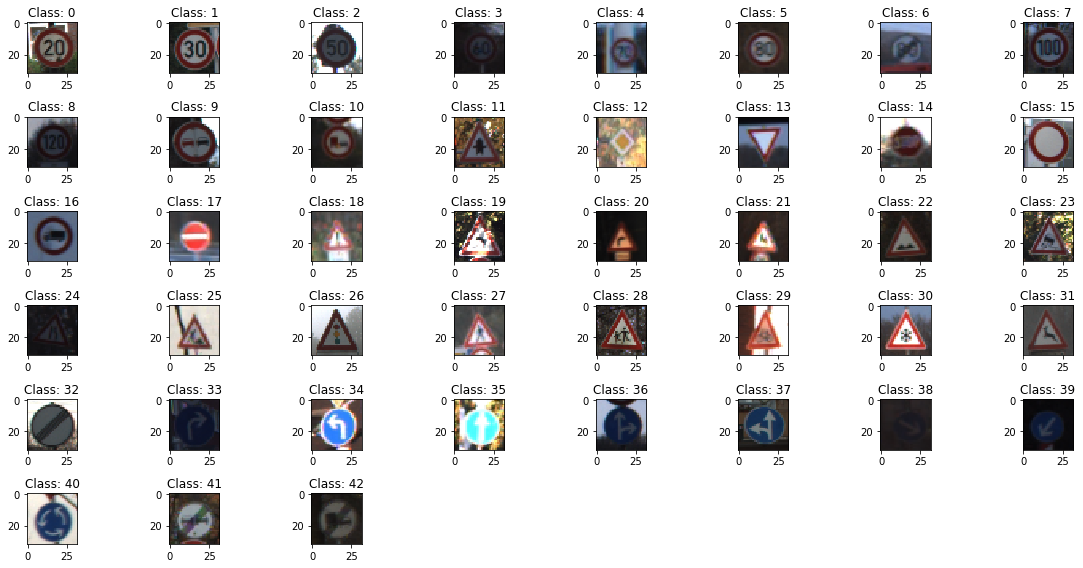

Count of training examples from each class:


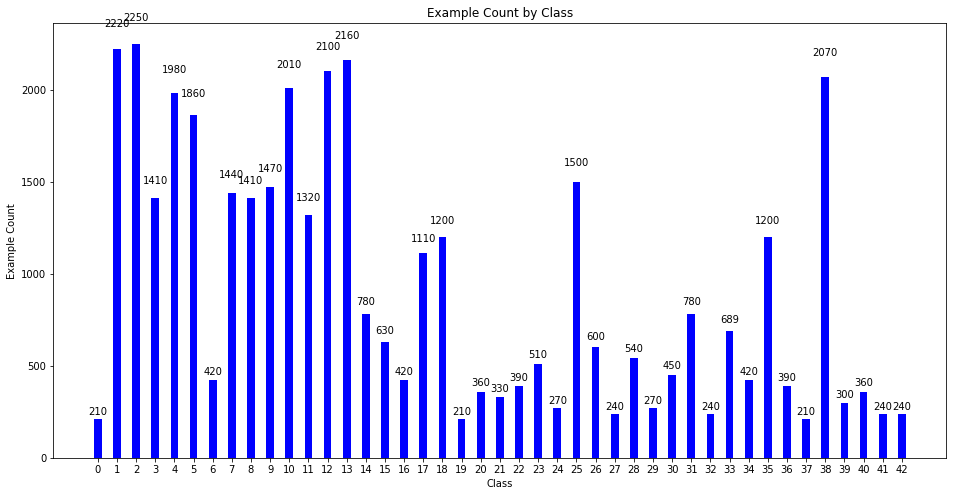

In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

import numpy as np
import matplotlib.pyplot as plt
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

# Visualizing the signs from each class

randomRange = list(range(0, len(X_train)))
random.shuffle(randomRange)

print("Signs from each class:")

found_all = False
classes = {}

for i in randomRange:
    if len(classes) == n_classes:
        break
    y = y_train[i]
    if y in classes:
        continue
    classes.update({y : X_train[i]})

fig = plt.figure(figsize=(16,8), tight_layout=True)
c = 1
for class_image in classes.values():
    subplt = fig.add_subplot(6,8,c)
    subplt.set_title("Class: %d" %(c-1), loc='center')
    imgplot = plt.imshow(class_image)
    c += 1

plt.show()


# Visualizing the counts of training examples from each class

print("Count of training examples from each class:")
class_data = {}
for i in range(0, n_classes):
    class_data[i] = 0
for i in range(0, len(X_train)):
    y = y_train[i]
    class_data[y] = class_data[y] + 1

# show bar chart of the count of traning examples by class
N = n_classes
class_counts = class_data.values()
ind = np.arange(N)
width = 0.40

fig, ax = plt.subplots(figsize=(16,8))
rects1 = ax.bar(ind, class_counts, width, color='b')

ax.set_xlabel('Class')
ax.set_ylabel('Example Count')
ax.set_title('Example Count by Class')
ax.set_xticks(ind)
ax.set_xticklabels(class_data.keys())

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.05*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [5]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

from sklearn.utils import shuffle
from sklearn import preprocessing

grayscale = True

def preprocess(x, y=None, grayscale=False):
    if grayscale:
        x = 0.299 * x[:, :, :, 0] + 0.587 * x[:, :, :, 1] + 0.114 * x[:, :, :, 2]
        x = x.reshape(x.shape + (1,))
    
    if y is not None:
        x, y = shuffle(x, y)
        
    return x, y

X_train, y_train = preprocess(X_train, y_train, grayscale)
print("Training set converted to grayscale")

Training set converted to grayscale


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** <br>
**Prepocessing:** <br>

**Shuffle:** <br>
As part of the preprocessing I am suffling the training set. The training set is ordered in sequence of the sign classes. Since we are running the training in batches, without suffling the network might not train well. 

**Grayscale:** <br>
I am also preprocessessing to use only the Y channel of the images from the YCbCr representation. My test runs shows that using the Y channel only improves the validation and testing accuracies as compared to using the R, G and B channels.

In [6]:
### Generate additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

from sklearn.model_selection import train_test_split

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print("Size of training set =", X_train.shape)
print("Size of validation set =", X_validation.shape)

Size of training set = (31367, 32, 32, 1)
Size of validation set = (7842, 32, 32, 1)


### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**<br>
The test data is provided in the Germen Traffic Dataset. 20% of the traning set is sliced to be used as the validation set.

In [7]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def sign_classifier_convnet(x, input_depth, classes, keep_prob=0.5, intermediate_drop=False):
    mu = 0
    sigma = 0.1
    
    # Layer 1: Convolutional
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, input_depth, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # RELU Activation
    conv1 = tf.nn.relu(conv1)

    # Pooling
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # Layer 2: Convolutional
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # RELU Activation
    conv2 = tf.nn.relu(conv2)
    
    # Pooling
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # dropout
    conv2_drop = tf.nn.dropout(conv2, keep_prob)
    
    # Flatten
    fc0   = flatten(conv2_drop)
    
    # Layer 3: Fully Connected
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # RELU Activation
    fc1    = tf.nn.relu(fc1)

    # Layer 4: Fully Connected
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # RELU Activation
    fc2    = tf.nn.relu(fc2)
    
    # dropout
    fc2_drop = tf.nn.dropout(fc2, keep_prob)

    # Layer 5: Fully Connected
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, classes), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(classes))
    
    logits = tf.matmul(fc2_drop, fc3_W) + fc3_b
    
    return logits, fc1_W, fc2_W, fc3_W

In [27]:
# Parameters
rate = 0.001
EPOCHS = 100
BATCH_SIZE = 128

# Features and labels
input_depth = 1
classes = n_classes
x = tf.placeholder(tf.float32, (None, 32, 32, input_depth))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, classes)

# Regularization
keep_prob  = tf.placeholder(tf.float32)
keep_prob_val = 0.5
l2_lambda = 0.0001
l2_reg = True

# Training pipeline
logits, fc1_W, fc2_W, fc3_W = sign_classifier_convnet(x, input_depth, classes, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)

l2_reg_loss = 0
if l2_reg:
    l2_reg_loss = l2_lambda * tf.nn.l2_loss(fc1_W) + l2_lambda * tf.nn.l2_loss(fc2_W) + l2_lambda * tf.nn.l2_loss(fc3_W)

loss_operation = (tf.reduce_mean(cross_entropy) + l2_reg_loss)

optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

# Model evaluation
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**<br>
I have used a deep neural network as the model for the classifier. 

**Layers:**<br>
The architecture has 2 convolutional layers and 3 fully connected layers.

Layer 1, 5x5 Convolution, size=6<br>
Layer 2, 5x5 Convolution, size=16, keep_probability=0.5<br>
Layer 3, Fully Connected, size=400<br> 
Layer 4, Fully Connected, size=120<br>
Layer 5, Fully Connected, size=84, keep_probability=0.5<br>

Each convolutional layer is folllowed by a **RELU activation** layer and **max pooling** is used to reduce the input size for the next layer. A filter size of **5x5** is used for each convolutional layer. **Dropout** is used for regularization in the architecture at two positions - after the covolutional layers and after the last fully connected layer. **L2 regularization** is also applied to the loss function by using the weights from the three fully connected layers.

In [28]:
### Train your model here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("learning rate             = ", rate)
    print("batch size                = ", BATCH_SIZE)
    print("total epochs              = ", EPOCHS)
    print("preprocessing - grayscale = ", "ON" if grayscale else "OFF")
    print("dropout keep probability  = ", keep_prob_val)
    print("L2 regularization         = ", "ON" if l2_reg else "OFF")
    if l2_reg:
        print("l2 lambda                 = ", l2_lambda)
    print()
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob: keep_prob_val})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './traffic_sign')
    print("Model saved")

learning rate             =  0.001
batch size                =  128
total epochs              =  100
preprocessing - grayscale =  ON
dropout keep probability  =  0.5
L2 regularization         =  ON
l2 lambda                 =  0.0001

Training...

EPOCH 1 ...
Validation Accuracy = 0.145

EPOCH 2 ...
Validation Accuracy = 0.308

EPOCH 3 ...
Validation Accuracy = 0.438

EPOCH 4 ...
Validation Accuracy = 0.547

EPOCH 5 ...
Validation Accuracy = 0.678

EPOCH 6 ...
Validation Accuracy = 0.775

EPOCH 7 ...
Validation Accuracy = 0.794

EPOCH 8 ...
Validation Accuracy = 0.836

EPOCH 9 ...
Validation Accuracy = 0.869

EPOCH 10 ...
Validation Accuracy = 0.895

EPOCH 11 ...
Validation Accuracy = 0.898

EPOCH 12 ...
Validation Accuracy = 0.921

EPOCH 13 ...
Validation Accuracy = 0.924

EPOCH 14 ...
Validation Accuracy = 0.934

EPOCH 15 ...
Validation Accuracy = 0.936

EPOCH 16 ...
Validation Accuracy = 0.943

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.952

EPOCH

In [29]:
# Test accuracy

X_test_grayscale, y_test_grayscale = preprocess(X_test, y_test, grayscale)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test_grayscale, y_test_grayscale)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.954


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**<br>

I have used the AdamOptimizer as it uses the momentum technique and also has the capability to converge without fine tuning even if a larger step size is used. I have tested the model by tuning the hyperparameters such as epochs, batch size and learning rate. I have also tested with the **dropout** and **L2 regularization** techniques to prevent overfitting. The final setup is as following:

learning rate             =  0.001<br>
batch size                =  128<br>
total epochs              =  120<br>
preprocessing - grayscale =  ON<br>
dropout keep probability  =  0.5<br>
L2 regularization         =  ON<br>
L2 lambda                 = 0.0001<br>

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**<br>
I took inspiration from the LeNet-5 architecture. The LeNet architecture is a convolutional neural network that works with image data for character recognition. I had a similar problem at hand, i.e., classifying traffic signs from image data. The convolutional layers in the architecture are used for feature extraction and the fully connected layers are used for classification.

I have experimented with the model by tuning various hyperparameters and regulariation techniques. At first, without using any regularization, my model was giving a ~98.5 % of validation accuracy and the testing accuracy was close to 90%. By using the **dropout** and **L2 regularization** techniques for controlling the overfitting I could boost the training accuracy to **~99.2%** and the test accuracy to **~95%**.

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

New test images: 


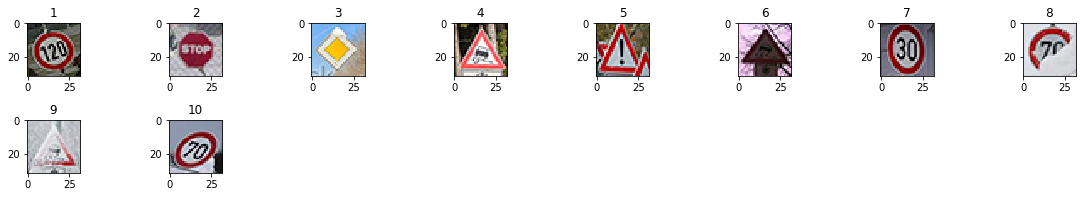

In [30]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import scipy.ndimage
from glob import glob

print("New test images: ")

X_new_test = np.array([ scipy.ndimage.imread(f) for f in glob('test_images/*') ])

fig = plt.figure(figsize=(16,8), tight_layout=True)
c = 1
for test_image in X_new_test:
    subplt = fig.add_subplot(6,8,c)
    subplt.set_title("%d" % c, loc='center')
    imgplot = plt.imshow(test_image)
    c += 1

plt.show()

X_new_test_grayscale, _ = np.array(preprocess(X_new_test, grayscale = grayscale))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._


**Answer:**<br>
I have downloaded 10 candidate images from the internet as shown above. 

** Qualities That May Make Classification Difficult:**<br>
The **rotation** in the images 1 , 7, 10, the **blurriness** of the image 2, the weather activity and **partial blocking** in the images 3, 5, 8, 9 might cause difficulty in classifying the images. These difficulties might be eliminated by using data augmentation techniques such as flipping, rotation and projection, which I have not used for this project.

In [50]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

print("Shape of X_new_test = ", X_new_test_grayscale.shape)

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    p = sess.run(logits, feed_dict={x: X_new_test_grayscale, keep_prob: 1.0})

print("Probabilities = ", p)

Shape of X_new_test =  (10, 32, 32, 1)
Probabilities =  [[  6.34848952e-01   3.10922146e-01  -7.89762199e-01   2.12428355e+00
   -5.70302010e-01   8.45427811e-01   5.54865479e-01   1.39400196e+00
    4.15860224e+00  -1.27779686e+00  -3.78949380e+00  -3.39476395e+00
   -2.33962369e+00  -3.54803419e+00  -3.65521860e+00  -4.69063663e+00
   -1.31443930e+00  -4.04292536e+00  -5.61975002e+00  -4.14533424e+00
   -2.67885470e+00  -5.25630856e+00  -4.02719355e+00  -4.01786327e+00
   -5.88251829e+00  -3.51713204e+00  -5.20254564e+00  -6.42659664e+00
   -6.19868159e-01  -2.88964057e+00  -2.01643658e+00  -3.98328972e+00
   -2.81040519e-01  -1.45011568e+00  -3.41940212e+00  -3.08137321e+00
   -2.84321523e+00  -5.33123922e+00  -7.81958818e-01  -3.99937367e+00
   -5.95385551e-01  -4.29318619e+00  -3.09393167e+00]
 [  2.41183376e+00  -1.28037214e+00  -4.79265022e+00  -5.26281071e+00
   -1.68880379e+00  -2.65198135e+01  -3.37129745e+01  -1.89681511e+01
   -1.39331064e+01   3.41309237e+00  -2.29772320e+

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**<br>
The accuracy of the model on the new images is **80%** while it was **~95%** on the test images. Thus, it seems that the model is not general enough. The generalization of the model can be improved by using pre-processng techniques such as translation, rotation, scaling and using normalization technique such as Contrast-limited Adaptive Histogram Equalization.

TopKV2(values=array([[  4.15860224,   2.12428355,   1.39400196,   0.84542781,
          0.63484895],
       [ 26.36102867,  21.87838745,  20.85349846,   3.41309237,
          3.27284956],
       [ 70.74832916,  -5.7638731 ,  -9.69344139, -10.87628746,
        -12.54518414],
       [ 24.49841118,   5.54626226,   3.0031004 ,   0.31913278,
         -1.20412111],
       [ 32.91374969,  15.97792721,   7.28249311,   0.19737205,
         -4.38982773],
       [ 16.45333099,   2.53857231,  -1.89841056,  -2.02558517,
         -2.31677294],
       [ 45.4032402 ,   9.41420841,   6.79361629,  -2.52434421,
         -4.49113417],
       [  5.64905834,   2.77917552,   2.44279313,   2.12924576,
          0.55837101],
       [ 17.49516487,   4.93656254,   1.99637699,   1.2203207 ,
         -0.73117626],
       [  8.33321667,   2.06305933,   0.94309783,   0.75875401,
          0.14210594]], dtype=float32), indices=array([[ 8,  3,  7,  5,  0],
       [17, 33, 14,  9, 39],
       [12,  1, 38,  2, 40],
    

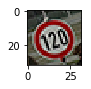

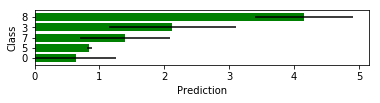

Image 2


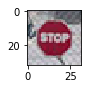

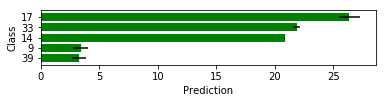

Image 3


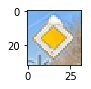

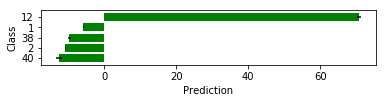

Image 4


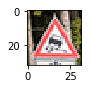

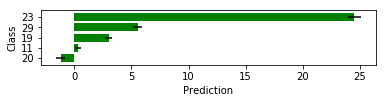

Image 5


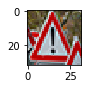

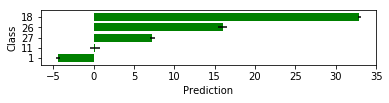

Image 6


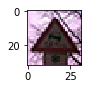

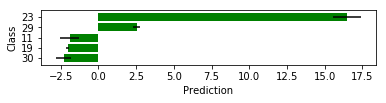

Image 7


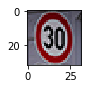

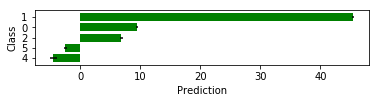

Image 8


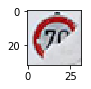

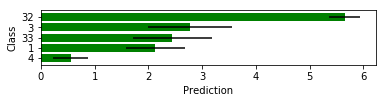

Image 9


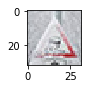

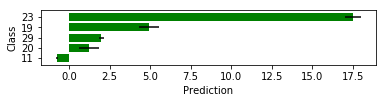

Image 10


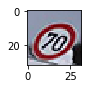

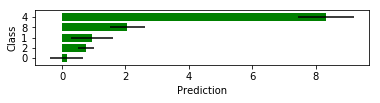

In [51]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

with tf.Session() as sess:
    top = sess.run(tf.nn.top_k(tf.constant(p), k=5))

print(top)

def plot_prediction(image, prediction, class_label):
    
    plt.figure(figsize=(1,1))
    plt.imshow(image)
    
    fig, ax = plt.subplots(figsize = (6, 1))

    y_pos = np.arange(len(class_label))
    error = np.random.rand(len(prediction))

    ax.barh(y_pos, prediction, xerr=error, align='center', color='green', ecolor='black')
    ax.set_yticks(y_pos)
    ax.set_yticklabels(class_label)
    ax.invert_yaxis()
    ax.set_xlabel('Prediction')
    ax.set_ylabel('Class')

    plt.show()

count = 1 
for image, p,c in zip(X_new_test, top[0], top[1]):
    print("Image", count)
    plot_prediction(image, p, c)
    count +=1

# new images correct classification = [8, 14, 12, 23, 18, 23, 1, 4, 23, 4]

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

I got a 80% accuracy on the newly downloaded images. The new images and their corresponding prediction bar chart is show above. 

**Incorrect:**<br>
The image number 2, which was a blurred stop sign (i.e., class 14), was incorrectly predicted. The correct prediction is the 3rd largest prediction in top 5 predictions. The image number 8, which was a partially obstructed 70 kmph sign (i.e., class 4) was incorrectly predicted. The correct prediction is the 5th largest prediction in the top 5 predictions.

**Certainty:**<br>
Image numbers 3, 4, 6 and 7 were correctly predicted with high certainty. 

**Uncertainty:**<br>
Image numbers 1, 5, 9 and 10 are predicted correctly, but with relatively less certainty. This might be a result of sign rotation and partial blocking that were present in the images.

**Improvement:**<br>
The difficulty in classification of these images can be improved by using data augmentation techniques such as flipping, rotation and projection.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.